## Matplotlib

Matplotlib is the "grandfather" library of data visualization with Python. 

Some of the major Pros of Matplotlib are:

* Generally easy to get started for simple plots
* Support for custom labels and texts
* Great control of every element in a figure
* High-quality output in many formats
* Very customizable in general

In [1]:
# import 
import matplotlib.pyplot as plt


In [2]:
# to see plots inline

%matplotlib inline

That line is only for Jupyter Notebooks.

Use **plt.show()** at the end of all your plotting commands if you are using another Integrated Development Environment (IDE) to have the figure pop up in another window.

In [3]:
import numpy as np

#x axis
x = np.linspace(0, 5, 11)

#y axis
y = x ** 2



In [4]:
# dump x
x

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

In [5]:
# dump y
y

array([ 0.  ,  0.25,  1.  ,  2.25,  4.  ,  6.25,  9.  , 12.25, 16.  ,
       20.25, 25.  ])

### Basic Plot

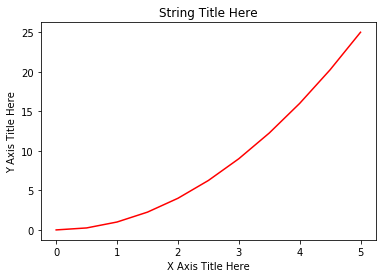

In [11]:
plt.plot(x, y, 'r') # 'r' is the color red
plt.xlabel('X Axis Title Here')
plt.ylabel('Y Axis Title Here')
plt.title('String Title Here')
plt.show()





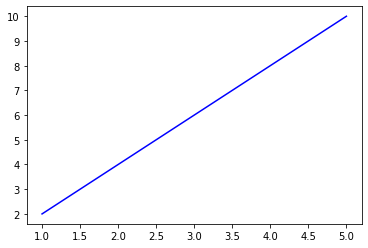

In [12]:
x2 = [1,2,3,4,5]
y2 = [2,4,6,8,10]

plt.plot(x2, y2, 'b')
plt.show()

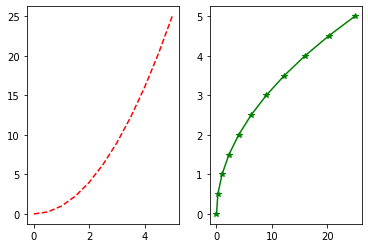

In [15]:
# plt.subplot(nrows, ncols, plot_number)

plt.subplot(1,2,1)
plt.plot(x, y, 'r--') # dashed red
plt.subplot(1,2,2)
plt.plot(y, x, 'g*-') # asterisk green






### More examples using actual data

In [16]:
import pandas as pd

filename = "ncr_shs.csv"
df = pd.read_csv(filename)

In [18]:
# dump dataframe

df.head()

,MUNICIPALITY,SCHOOL ID,SCHOOL NAME,PROGRAM OFFERINGS,STEM,ABM,HUMSS,GAS,TVL,Arts and Design,Sports,OFFERINGS COUNT
0,City of Makati,407698,"Globetek Science Foundation, Inc.",STEM|ABM|HUMSS|GAS,True,True,True,True,False,False,False,4
1,Manila City,406330,Lorenzo Ruiz Academy,ABM|STEM,True,True,False,False,False,False,False,2
2,Manila City,406335,Tiong Se Academy,GAS|ABM,False,True,False,True,False,False,False,2
3,Kalookan City,400942,ABE International Business College-Caloocan Ca...,ABM|TVL,False,True,False,False,True,False,False,2
4,Kalookan City,400947,AMA Computer College-Caloocan City,STEM|ABM|HUMSS|GAS|TVL,True,True,True,True,True,False,False,5


In [21]:
# groupby

muni_count = df.loc[:,["MUNICIPALITY","SCHOOL NAME"]].groupby(by="MUNICIPALITY", as_index=False).count().rename(columns={'SCHOOL NAME':"count"})
muni_count=muni_count.sort_values(by="count")
muni_count



,MUNICIPALITY,count
13,Pateros,4
9,Navotas City,4
5,Malabon City,14
15,San Juan City,15
6,Mandaluyong City,19
11,Pasay City,22
3,City of Valenzuela,30
1,City of Makati,33
8,Marikina City,35
2,City of Muntinlupa,35


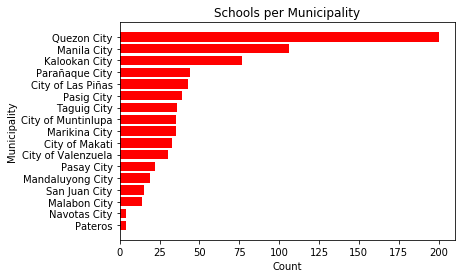

In [22]:
# draw horizontal bar graph
plt.barh(y=muni_count["MUNICIPALITY"], width=muni_count["count"], color='r')
plt.xlabel("Count")
plt.ylabel("Municipality")
plt.title("Schools per Municipality")
plt.show()





# Matplotlib Object Oriented Method
Now that we've seen the basics, let's break it all down with a more formal introduction of Matplotlib's Object Oriented API. This means we will instantiate figure objects and then call methods or attributes from that object.

The main idea in using the more formal Object Oriented method is to create figure objects and then just call methods or attributes off of that object. This approach is nicer when dealing with a canvas that has multiple plots on it.

To begin we create a figure instance. Then we can add axes to that figure:

Text(0.5, 1.0, 'Set Title')

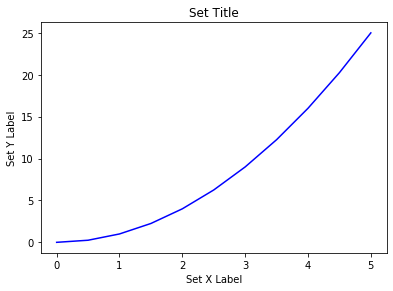

In [26]:
# Create Figure (empty canvas)
fig = plt.figure()

# Add set of axes to figure
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height --> range 0 to 1


# Plot on that set of axes
axes.plot(x, y, 'b')
axes.set_xlabel('Set X Label')
axes.set_ylabel('Set Y Label')
axes.set_title('Set Title')






Text(0.5, 1.0, 'Axes 2 Title')

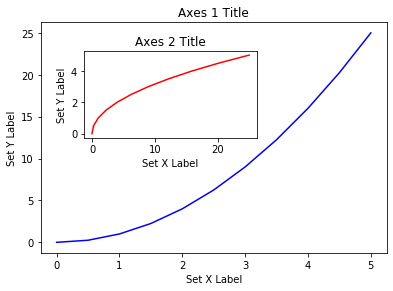

In [28]:
# Create Figure (empty canvas)
fig = plt.figure()

# Add set of axes to figure
# main
axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height --> range 0 to 1
# smaller
axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3])

# Larger Plot
axes1.plot(x, y, 'b')
axes1.set_xlabel('Set X Label')
axes1.set_ylabel('Set Y Label')
axes1.set_title('Axes 1 Title')

# Smaller Plot
axes2.plot(y, x, 'r')
axes2.set_xlabel('Set X Label')
axes2.set_ylabel('Set Y Label')
axes2.set_title('Axes 2 Title')






Text(0.5, 1.0, 'Axes Title')

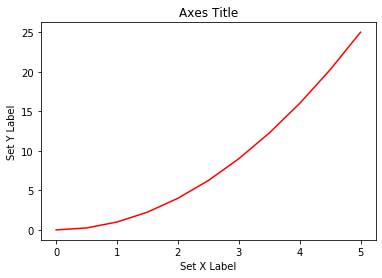

In [29]:
# Use similar to plt.figure() except use tuple unpacking to grab fig and axes
fig, axes = plt.subplots()

# Now use the axes object to add stuff to plot
axes.plot(x, y, 'r')
axes.set_xlabel('Set X Label')
axes.set_ylabel('Set Y Label')
axes.set_title('Axes Title')





### Figure size, aspect ratio and DPI

Matplotlib allows the aspect ratio, DPI and figure size to be specified when the Figure object is created. You can use the `figsize` and `dpi` keyword arguments. 
* `figsize` is a tuple of the width and height of the figure in inches
* `dpi` is the dots-per-inch (pixel per inch). 

For example:

In [30]:
fig = plt.figure(figsize=(8,4), dpi=100)

<Figure size 800x400 with 0 Axes>

Text(0.5, 1.0, 'Axes Title')

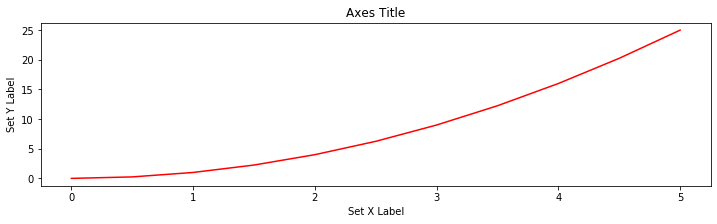

In [31]:
fig, axes = plt.subplots(figsize=(12,3))

axes.plot(x, y, 'r')
axes.set_xlabel('Set X Label')
axes.set_ylabel('Set Y Label')
axes.set_title('Axes Title')





## Saving figures
Matplotlib can generate high-quality output in a number formats, including PNG, JPG, EPS, SVG, PGF and PDF. 

To save a figure to a file we can use the `savefig` method in the `Figure` class:

In [32]:
fig.savefig("filename.png")

In [33]:
# using dpi
fig.savefig("filename.png", dpi=200)


### Legends

You can use the **label="label text"** keyword argument when plots or other objects are added to the figure, and then using the **legend** method without arguments to add the legend to the figure: 

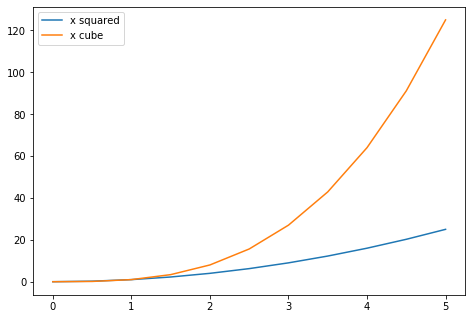

In [36]:

fig = plt.figure()

ax = fig.add_axes([0,0,1,1,])

ax.plot(x, x**2, label="x squared")
ax.plot(x, x**3, label="x cube")
ax.legend()



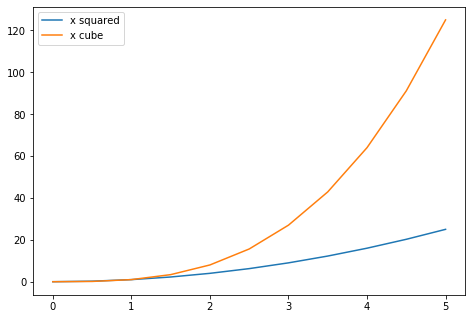

In [41]:
# Lots of options....
ax.legend(loc=1) # upper right corner
ax.legend(loc=2) # upper left corner
ax.legend(loc=3) # lower left corner
ax.legend(loc=4) # lower right corner


# .. many more options are available

# Most common to choose
ax.legend(loc=0) # let matplotlib decide the optimal location
fig



### Line and line markers

To change the line width, we can use the `linewidth` or `lw` keyword argument. The line style can be selected using the `linestyle` or `ls` keyword arguments:


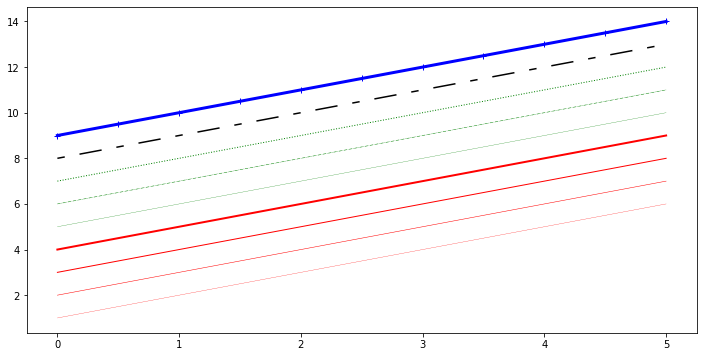

In [49]:

fig, ax = plt.subplots(figsize=(12,6))

ax.plot(x, x+1, color="red", linewidth=0.25)
ax.plot(x, x+2, color="red", linewidth=0.50)
ax.plot(x, x+3, color="red", linewidth=1.00)
ax.plot(x, x+4, color="red", linewidth=2.00)

# possible linestylee options '-' '-', '-.', ':'
ax.plot(x, x+5, color="green", lw=0.25, linestyle='-')
ax.plot(x, x+6, color="green", lw=0.50, ls='-.')
ax.plot(x, x+7, color="green", lw=1.00, ls=':')


# custom dash
line, = ax.plot(x, x+8, color="black", lw=1.50)
line.set_dashes([5,10,15,10])

# possible marker symbols
ax.plot(x, x+9, color="blue", lw=3, ls='-', marker="+")




### Special Plot Types

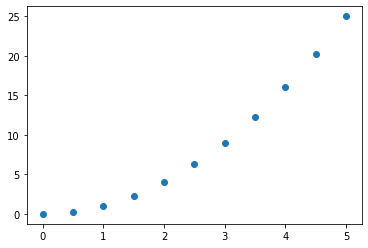

In [50]:
# scatter
plt.scatter(x,y)


(array([ 9., 10.,  9.,  9., 10.,  7., 12.,  8., 14., 12.]),
 array([  7., 106., 205., 304., 403., 502., 601., 700., 799., 898., 997.]),
 <a list of 10 Patch objects>)

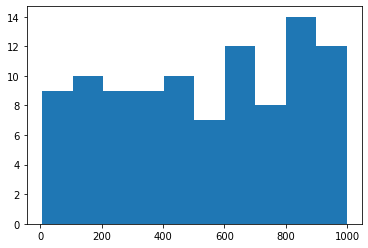

In [51]:
from random import sample

data = sample(range(1, 1000), 100)
plt.hist(data)




{'whiskers': [<matplotlib.lines.Line2D at 0x7ff577fe0310>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff577fb6350>,
 'boxes': [<matplotlib.patches.PathPatch at 0x7ff577fcdb90>,
 'medians': [<matplotlib.lines.Line2D at 0x7ff577e4c8d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7ff576c1cfd0>,
 'means': []}

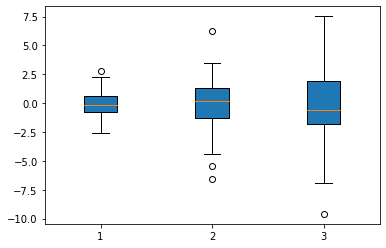

In [52]:

# rectangular box plot
data = [np.random.normal(0, std, 100) for std in range(1,4)]

plt.boxplot(data,vert=True, patch_artist=True)


<BarContainer object of 5 artists>

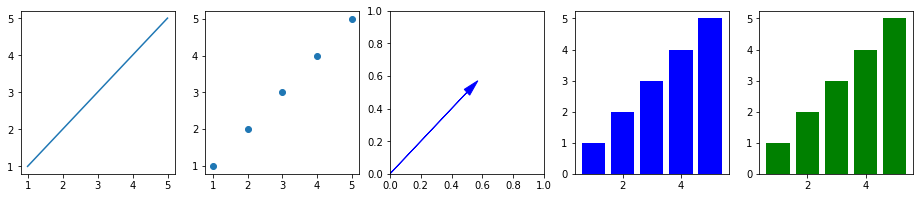

<Figure size 792x432 with 0 Axes>

In [75]:

x = [1,2,3,4,5]
y = [1,2,3,4,5]


fig,ax = plt.subplots(1,5)
plt.figure(figsize=(11, 6))
fig.set_size_inches(16,3)

ax[0].plot(x,y)
ax[1].scatter(x,y)
ax[2].arrow(0,0,.5,.5,head_width=0.05,head_length=0.1,facecolor="Blue",edgecolor="Blue")
ax[3].bar(height=y,x=x,color="Blue")
ax[4].bar(height=y,x=x,color="Green")




